### Peer-Graded Assignment: Final Assignment – Part 1 and 2

The dataset used in this lab comes from the following source: https://data.world/montgomery-county-of-maryland/1f06ef22-f2db-433c-b589-59afcab814ce under a Public Domain license. This data originates from the US Open Data Portal at https://data.world/datagov-us.

We are using a modified subset of that dataset for the lab, so to follow the lab instructions successfully please use the dataset provided with the lab, rather than the dataset from the original source.

Tasks to perform:

Save the CSV file as an XLSX file: Click the 'Edit Workbook' button in the ToolTip to save the file as an XLSX file. The file is converted when you click 'OK' in the prompt.

Column widths: Sort out the widths of all columns so that the data is clearly visible in all cells.

Empty rows: Use the Filter feature to look for blanks and remove all empty rows from the data.

Duplicate records: Use either the Conditional Formatting or Remove Duplicates feature to look for and remove any duplicated records from the data.

Spelling: The original source file data has not been checked for errors in the spelling. Check for spelling mistakes in the data and fix them.

Whitespace: Use the Find and Replace feature to remove all double-spaces from the data.

Department names: When the data was converted from its data source, the department names (see correct list below) didn’t import correctly and they are now split over two columns in the data. Use Flash Fill to reduce the department names to just one column, and then remove any unnecessary columns.

    
    
Department 	        Department
Board of Elections 	Economic Development
Circuit Court 	Environmental Protection
Community Engagement Cluster 	Finance
Community Use of Public Facilities 	Fire and Rescue
Consumer Protection 	General Services
Correction and Rehabilitation 	Health and Human Services
County Executives Office 	

Save your workbook: Use 'Save As' to save your completed workbook as Montgomery_Fleet_Equipment_Inventory_FA_PART_1_END.XLSX


### Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|

### Summary

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv("equipment.csv")

In [3]:
df

,Department,Department.1,Equipment Class,Equipment Count
0,Board of,Elections,Van,1
1,Board of,Elections,Off Road VehicleEquipment,2
2,Circuit,Court,SUV,1
3,Community Engagement,Cluster,Pick Up Trucks,8
4,Community Engagement,Cluster,Off Road VehicleEquipment,7
5,Community Engagement,Cluster,SUV,2
6,Community Use of Public,Facilities,Sedan,1
7,Community Use of Public,Facilities,Sedan,1
8,Consumer,Protection,Sedan,1
9,Correction and,Rehabilitation,Off Road VehicleEquipment,3


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Department       57 non-null     object
 1   Department.1     56 non-null     object
 2   Equipment Class  57 non-null     object
 3   Equipment Count  57 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.9+ KB


In [5]:
df.describe()

,Equipment Count
count,57.000000
mean,9.631579
std,14.536446
min,1.000000
25%,1.000000
50%,3.000000
75%,12.000000
max,75.000000


In [6]:
df.columns

Index(['Department', 'Department.1', 'Equipment Class', 'Equipment Count'], dtype='object')

In [7]:
df["Name"] = df["Department"] + df["Department.1"]

In [8]:
df.head()

,Department,Department.1,Equipment Class,Equipment Count,Name
0,Board of,Elections,Van,1,Board ofElections
1,Board of,Elections,Off Road VehicleEquipment,2,Board ofElections
2,Circuit,Court,SUV,1,CircuitCourt
3,Community Engagement,Cluster,Pick Up Trucks,8,Community EngagementCluster
4,Community Engagement,Cluster,Off Road VehicleEquipment,7,Community EngagementCluster


In [9]:
df.drop(['Department', 'Department.1'],axis=1,inplace=True)

In [10]:
df.head()

,Equipment Class,Equipment Count,Name
0,Van,1,Board ofElections
1,Off Road VehicleEquipment,2,Board ofElections
2,SUV,1,CircuitCourt
3,Pick Up Trucks,8,Community EngagementCluster
4,Off Road VehicleEquipment,7,Community EngagementCluster


In [11]:
df = df[["Name","Equipment Class","Equipment Count"]]

In [12]:
df

,Name,Equipment Class,Equipment Count
0,Board ofElections,Van,1
1,Board ofElections,Off Road VehicleEquipment,2
2,CircuitCourt,SUV,1
3,Community EngagementCluster,Pick Up Trucks,8
4,Community EngagementCluster,Off Road VehicleEquipment,7
5,Community EngagementCluster,SUV,2
6,Community Use of PublicFacilities,Sedan,1
7,Community Use of PublicFacilities,Sedan,1
8,ConsumerProtection,Sedan,1
9,Correction andRehabilitation,Off Road VehicleEquipment,3


### Data Visualization

### Univariate Data Exploration

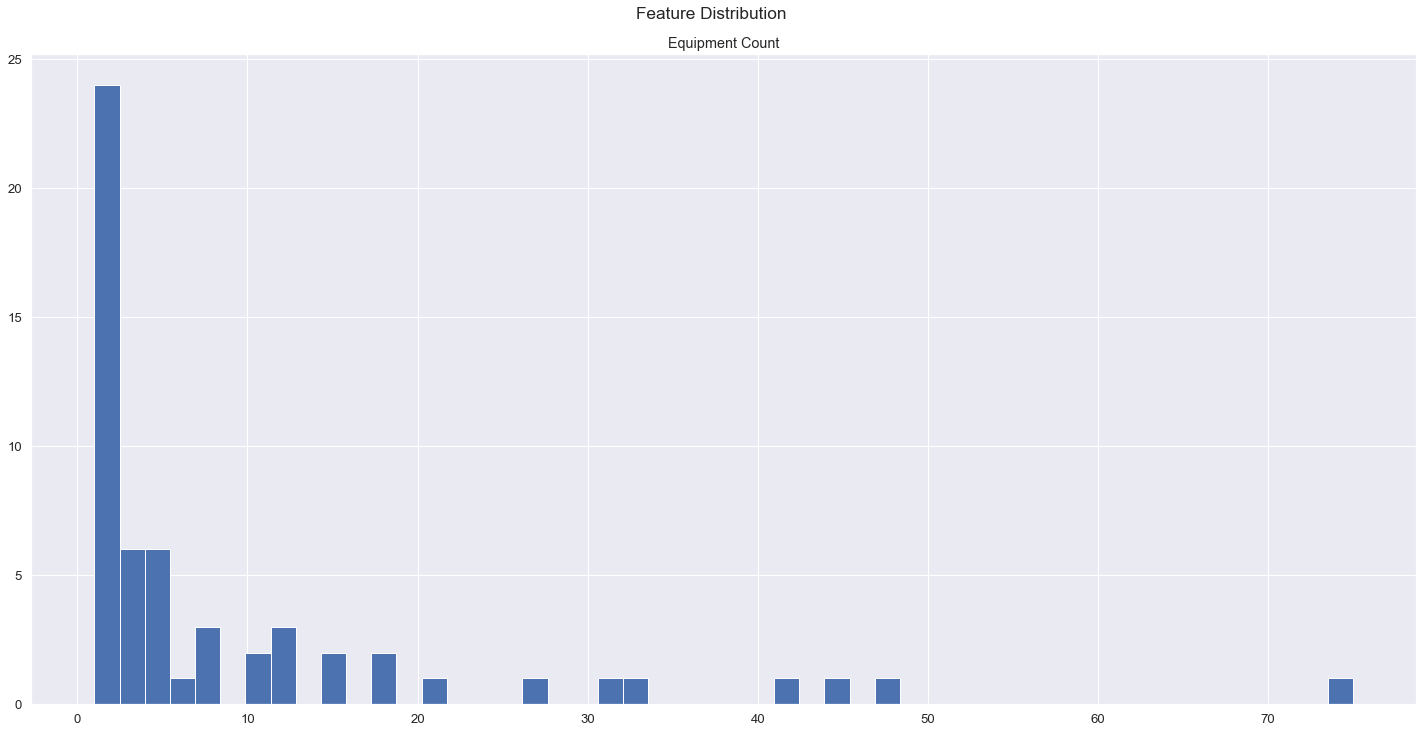

In [13]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

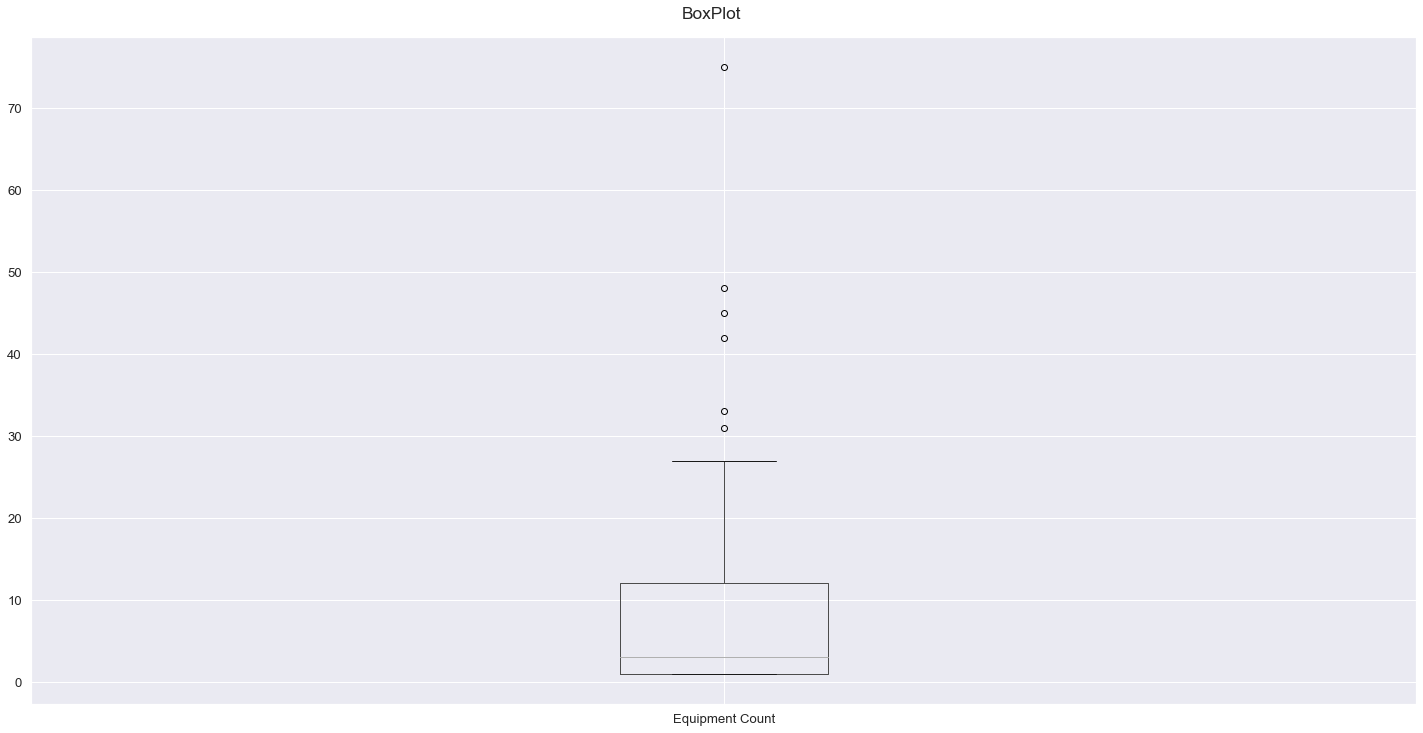

In [14]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

### Data Preprocessing

### Treat Missing Values

In [15]:
df.isnull().sum()

Name               1
Equipment Class    0
Equipment Count    0
dtype: int64

In [16]:
df.iloc[27] = df.iloc[27].replace(np.nan, "Finance")

In [17]:
df.iloc[27]

Name               Finance
Equipment Class      Sedan
Equipment Count          3
Name: 27, dtype: object

In [18]:
df

,Name,Equipment Class,Equipment Count
0,Board ofElections,Van,1
1,Board ofElections,Off Road VehicleEquipment,2
2,CircuitCourt,SUV,1
3,Community EngagementCluster,Pick Up Trucks,8
4,Community EngagementCluster,Off Road VehicleEquipment,7
5,Community EngagementCluster,SUV,2
6,Community Use of PublicFacilities,Sedan,1
7,Community Use of PublicFacilities,Sedan,1
8,ConsumerProtection,Sedan,1
9,Correction andRehabilitation,Off Road VehicleEquipment,3


In [19]:
df.isnull().sum()

Name               0
Equipment Class    0
Equipment Count    0
dtype: int64

### Replacing values

In [20]:
df["Name"] = df["Name"].replace({'Board ofElections':'Board of Elections','CircuitCourt':'Circuit Court',
                                'Community EngagementCluster':'Community Engagement Cluster',
                                'Community Use of PublicFacilities': 'Community Use of Public Facilities',
                                'ConsumerProtection':'Consumer Protection',
                                'Correction andRehabilitation':'Correction and Rehabilitation',
                                'Correction andRehabilltation':'Correction and Rehabilitation',
                                'County ExecutivesOffice':'County Executives Office',
                                'EconomicDevelopment':'Economic Development',
                                'EnviromnentalProtection': 'Environmental Protection',
                                'Fire andRescue':'Fire and Rescue','Fire andRecsue':'Fire and Rescue',
                                'GeneralServices': 'General Services',
                                'GeneralServcies':'General Services',
                                'Health and HumanServices':'Health and Human Services',
                                'Health and HumanServcies':'Health and Human Services'
                                })

In [21]:
df

,Name,Equipment Class,Equipment Count
0,Board of Elections,Van,1
1,Board of Elections,Off Road VehicleEquipment,2
2,Circuit Court,SUV,1
3,Community Engagement Cluster,Pick Up Trucks,8
4,Community Engagement Cluster,Off Road VehicleEquipment,7
5,Community Engagement Cluster,SUV,2
6,Community Use of Public Facilities,Sedan,1
7,Community Use of Public Facilities,Sedan,1
8,Consumer Protection,Sedan,1
9,Correction and Rehabilitation,Off Road VehicleEquipment,3


### Treat Duplicate Values

In [22]:
df.duplicated(keep='first').sum()

4

In [23]:
df[df.duplicated(keep=False)] #Check duplicate values

,Name,Equipment Class,Equipment Count
6,Community Use of Public Facilities,Sedan,1
7,Community Use of Public Facilities,Sedan,1
23,Environmental Protection,CUV,1
24,Environmental Protection,CUV,1
29,Fire and Rescue,Public Safety Pick Up Trucks,12
30,Fire and Rescue,Public Safety Pick Up Trucks,12
38,Fire and Rescue,Public Safety CUV,4
42,Fire and Rescue,Public Safety CUV,4


In [24]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [25]:
df

,Name,Equipment Class,Equipment Count
0,Board of Elections,Van,1
1,Board of Elections,Off Road VehicleEquipment,2
2,Circuit Court,SUV,1
3,Community Engagement Cluster,Pick Up Trucks,8
4,Community Engagement Cluster,Off Road VehicleEquipment,7
5,Community Engagement Cluster,SUV,2
6,Community Use of Public Facilities,Sedan,1
7,Consumer Protection,Sedan,1
8,Correction and Rehabilitation,Off Road VehicleEquipment,3
9,Correction and Rehabilitation,Public Safety Sedan,1


In [26]:
#df.to_csv("cleaned.csv",index=False)

Use AutoSum to calculate values: Use AutoSum to find the following values for column 'C' and record each of the values:

In [27]:
df.describe()

,Equipment Count
count,53.000000
mean,10.018868
std,14.960834
min,1.000000
25%,1.000000
50%,3.000000
75%,12.000000
max,75.000000


Use the PivotTable feature to create a pivot table that displays the Department field in the Rows section, and the Equipment Count in the Values section, so that the pivot table displays the sum of equipment count by department.

In [28]:
df = pd.read_csv("cleaned.csv")

In [29]:
df

,Name,Equipment Class,Equipment Count
0,Board of Elections,Van,1
1,Board of Elections,Off Road VehicleEquipment,2
2,Circuit Court,SUV,1
3,Community Engagement Cluster,Pick Up Trucks,8
4,Community Engagement Cluster,Off Road VehicleEquipment,7
5,Community Engagement Cluster,SUV,2
6,Community Use of Public Facilities,Sedan,1
7,Consumer Protection,Sedan,1
8,Correction and Rehabilitation,Off Road VehicleEquipment,3
9,Correction and Rehabilitation,Public Safety Sedan,1


In [30]:
pv1 = pd.pivot_table(data=df, values="Equipment Count", index="Name", aggfunc='sum')

In [31]:
pv1

,Equipment Count
Name,
Board of Elections,3
Circuit Court,1
Community Engagement Cluster,17
Community Use of Public Facilities,1
Consumer Protection,1
Correction and Rehabilitation,29
County Executives Office,5
Economic Development,1
Environmental Protection,72


Use the Sort By Value setting on the pivot table to sort it in descending order by the sum of equipment count.

In [32]:
pv1.sort_values(by='Equipment Count', ascending=False)

,Equipment Count
Name,
General Services,202
Fire and Rescue,100
Health and Human Services,96
Environmental Protection,72
Correction and Rehabilitation,29
Community Engagement Cluster,17
County Executives Office,5
Board of Elections,3
Finance,3


Make two more pivot tables exactly the same as task 3: Follow the same steps you performed in Tasks 3 and 4 to create two more identical pivot tables so that you end up with 3 worksheets that contain identical pivot tables.

In [33]:
pv2 = pd.pivot_table(data=df, values="Equipment Count", index="Name", aggfunc='sum')

In [34]:
pv2

,Equipment Count
Name,
Board of Elections,3
Circuit Court,1
Community Engagement Cluster,17
Community Use of Public Facilities,1
Consumer Protection,1
Correction and Rehabilitation,29
County Executives Office,5
Economic Development,1
Environmental Protection,72


In [35]:
pv3 = pd.pivot_table(data=df, values="Equipment Count", index="Name", aggfunc='sum')

In [36]:
pv3

,Equipment Count
Name,
Board of Elections,3
Circuit Court,1
Community Engagement Cluster,17
Community Use of Public Facilities,1
Consumer Protection,1
Correction and Rehabilitation,29
County Executives Office,5
Economic Development,1
Environmental Protection,72


In pivot table 2 add the Equipment Class field below the Department field so that the different vehicle types appear under each department with their respective counts.
Collapse all fields except the top one - Transportation

In [37]:
summary2 = df.groupby(['Name','Equipment Class']).sum()

In [38]:
summary2

Equipment Count
Name                               Equipment Class                              
Board of Elections                 Off Road VehicleEquipment                   2
                                   Van                                         1
Circuit Court                      SUV                                         1
Community Engagement Cluster       Off Road VehicleEquipment                   7
                                   Pick Up  Trucks                             8
                                   SUV                                         2
Community Use of Public Facilities Sedan                                       1
Consumer Protection                Sedan                                       1
Correction and Rehabilitation      CUV                                         1
                                   Off Road VehicleEquipment                   3
                                   Pick Up Trucks                              1
                                   Public  Safety SUV                          2
                                   Public  Safety Sedan                        1
                                   SUV                                         3
                                   Sedan                                      10
                                   Van                                         8
County Executives Office           Public Safety SUV                           3
                                   Sedan                                       2
Economic Development               SUV                                         1
Environmental Protection           CUV                                         1
                                   Medium Duty                                 2
                                   Pick Up Trucks                             33
                                   SUV                                        18
                                   Sedan                                      15
                                   Van                                         3
Finance                            Sedan                                       3
Fire and Rescue                    Heavy Duty                                  1
                                   Off Road VehicleEquipment                   2
                                   Pick Up Trucks                             12
                                   Public Safety CUV                           4
                                   Public Safety Heavy Duty                    1
                                   Public Safety Pick Up Trucks               12
                                   Public Safety SUV                          27
                                   Public Safety Sedan                        18
                                   Public Safety Van                          11
                                   SUV                                         6
                                   Sedan                                       1
                                   Transit Bus                                 1
                                   Van                                         4
General Services                   CUV                                         5
                                   Heavy Duty                                  5
                                   Medium Duty                                 3
                                   Off Road VehicleEquipment                  45
                                   Pick Up Trucks                             48
                                   Public Safety Heavy Duty                    1
                                   Public Safety Van                           1
                                   SUV                                        21
                                   Sedan                                      31
               